In [92]:
from sqlalchemy import create_engine, inspect
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Column, Integer, String, Table
from sqlalchemy.orm import Session
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.sql.expression import func
import datetime as dt

import pymysql
pymysql.install_as_MySQLdb()

import pandas as pd
import os

import matplotlib.pyplot as plt

In [93]:
# * Use SQLAlchemy `create_engine` to connect to your sqlite database.

engine = create_engine("sqlite:///hawaii.sqlite", echo=False)

In [94]:
inspector = inspect(engine)
inspector.get_table_names()

['Measurements', 'Stations']

In [95]:
# * Use SQLAlchemy `automap_base()` to reflect your tables into classes 
# and save a reference to those classes called `Station` and `Measurement`.

Base = automap_base()
Base.prepare(engine, reflect=True)

In [96]:
Measurements = Base.classes.Measurements
Stations = Base.classes.Stations

session = Session(engine)

In [97]:
results = (session
           .query(Measurements.prcp,Measurements.date)
          .filter(Measurements.date>=(dt.date.today()-dt.timedelta(days=365)))
          .all())
for result in results:
    print(result.prcp)

0
0
0
0
0
0.51
0
0
0
0.31
2.62
0.01
0
0
0.07
0
0
0
0
0.06
0.06
0.01
0
0.03
0
0
0
1.19
0.73
0.47
0
0.35
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.02
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.26
0.01
0
0.02
0
0.02
0.05
0.23
0.32
0.03
0
0
0
0
0
0.12
0.89
0.26
0
0
0
0
0
0
0
0
0.01
0
0
0
0.05
0.01
0
0.01
0
0
0
0
0.08
0.13
0.15
0.01
0.02
0
0.26
0.02
0
0
0.02
0
0
0
0
0
0
0.04
0.08
0.02
0
0
0
0
0
0.05
0
0.02
0
0
0
0.06
0
0
0
0
0
0.08
0.02
0.02
0.04
0.04
0
0
0
0
0
0
0
0
0.07
0.02
0
0.02
0.03
0.05
0.03
0
0.03
0
0.05
0
0
0
0
0
0
0
0.02
0
0
0.02
0
0
0
0
0
0
0
0
0
0
0.02
0
0
0
0
0
0
0
0
0
0
0.16
1.08
1.08
0.02
0
1
1.07
2.9
0
0
0
0.8
0
0
0
0
0.06
0
0
0
0
0
0.16
2.2
1.45
0.54
0
0.1
0.51
0
0
0.8
0.13
0.03
0
0
0
0
0
0.19
0
0
0
0
0
0
0.6
0.13
0
0
0.03
0
0.08
0
0
0
0.08
0.04
0.04
0
0
0
0
0.01
0.03
0.03
0.27
0.69
0.45
0.49
0.41
0.08
0.02
0.33
1.16
1.01
0.02
0
0
0
0.1
2.6
0.35
1.21
0.07
0.03
0.01
0
0
0
0.07
0.22
1.62
0.05
0.03
0.04
0.02
0.05
0.08
0.03
0.02
0.09
0.02
0
0
0
0.02
0.58
0.37
0.02
0
0.29
0.02
0.2
0.

In [98]:
prcp_list = [int(result[0]) for result in results]
date_list = [result[1] for result in results]
date_length=len(date_list)
print(date_length)

1090


In [99]:
df = pd.DataFrame(results, columns=['prcp_list', 'date_list'])
df.set_index('date_list', inplace=True, )
df.head(10)

,prcp_list
date_list,
2017-02-02,0.00
2017-02-03,0.00
2017-02-04,0.00
2017-02-05,0.00
2017-02-06,0.00
2017-02-07,0.51
2017-02-08,0.00
2017-02-09,0.00
2017-02-10,0.00


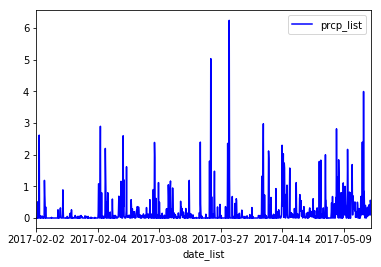

In [100]:
df.plot(color="blue",label="Precipitation")
plt.show()

In [101]:
# Design a query to calculate the total number of stations.

stations_total = (session
           .query(Stations.station)
          .count())
stations_total

9

In [102]:
stations_each = (session
           .query(Stations.station)
            .all())
stations_each

[('USC00511918'),
 ('USC00513117'),
 ('USC00514830'),
 ('USC00516128'),
 ('USC00517948'),
 ('USC00518838'),
 ('USC00519281'),
 ('USC00519397'),
 ('USC00519523')]

In [103]:
# Design a query to find the most active stations.
# List the stations and observation counts in descending order.
# Which station has the highest number of observations?

observation = (session
              .query(Measurements.station,func.sum(Measurements.tobs))
               .group_by(Measurements.station)
               .order_by(func.sum(Measurements.tobs)
                .desc())
                .all())
observation


[('USC00519397', 200205),
 ('USC00519281', 198652),
 ('USC00513117', 195940),
 ('USC00519523', 191698),
 ('USC00516128', 176029),
 ('USC00514830', 144913),
 ('USC00511918', 138191),
 ('USC00517948', 50943),
 ('USC00518838', 24855)]

In [104]:
# Design a query to retrieve the last 12 months of temperature observation data (tobs).
# Filter by the station with the highest number of observations.
# Plot the results as a histogram with `bins=12`.

month_12_tobs = (session.query(Measurements.station, Measurements.tobs, Measurements.date)
                .filter(Measurements.station == 'USC00519397')
                 .filter(Measurements.date>=(dt.date.today()-dt.timedelta(days=365)))
          .all())
month_12_tobs

[('USC00519397', 61, '2017-02-02'),
 ('USC00519397', 65, '2017-02-03'),
 ('USC00519397', 72, '2017-02-04'),
 ('USC00519397', 73, '2017-02-05'),
 ('USC00519397', 76, '2017-02-06'),
 ('USC00519397', 64, '2017-02-07'),
 ('USC00519397', 62, '2017-02-08'),
 ('USC00519397', 61, '2017-02-09'),
 ('USC00519397', 71, '2017-02-10'),
 ('USC00519397', 69, '2017-02-11'),
 ('USC00519397', 68, '2017-02-12'),
 ('USC00519397', 74, '2017-02-13'),
 ('USC00519397', 75, '2017-02-14'),
 ('USC00519397', 75, '2017-02-15'),
 ('USC00519397', 71, '2017-02-16'),
 ('USC00519397', 71, '2017-02-17'),
 ('USC00519397', 68, '2017-02-18'),
 ('USC00519397', 69, '2017-02-19'),
 ('USC00519397', 71, '2017-02-20'),
 ('USC00519397', 70, '2017-02-21'),
 ('USC00519397', 72, '2017-02-22'),
 ('USC00519397', 74, '2017-02-23'),
 ('USC00519397', 70, '2017-02-24'),
 ('USC00519397', 64, '2017-02-25'),
 ('USC00519397', 65, '2017-02-26'),
 ('USC00519397', 72, '2017-02-27'),
 ('USC00519397', 74, '2017-02-28'),
 ('USC00519397', 66, '2017-0

In [108]:
tobs_hist=pd.DataFrame(month_12_tobs).set_index('date')
tobs_hist.head()

,station,tobs
date,,
2017-02-02,USC00519397,61
2017-02-03,USC00519397,65
2017-02-04,USC00519397,72
2017-02-05,USC00519397,73
2017-02-06,USC00519397,76


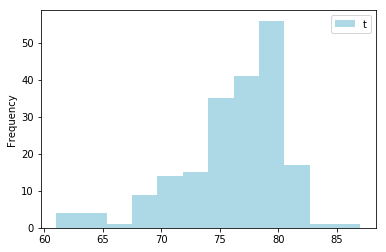

In [124]:
num_bins = 12
x= tobs_hist['tobs']
plt.hist(x,num_bins, color='lightblue')
plt.legend('tobs')
plt.ylabel('Frequency')

plt.show()

In [151]:
# Write a function called `calc_temps` that will accept a 
# start date and end date in the format `%Y-%m-%d` and return 
# the minimum, average, and maximum temperatures for that 
# range of dates.

def calc_temps(start_date, end_date):
    
    min_temp = session.query(func.min(Measurements.tobs)).filter(Measurements.date>=start_date).filter(Measurements.date<=end_date).all()
    
    max_temp = session.query(func.max(Measurements.tobs)).filter(Measurements.date>=start_date).filter(Measurements.date<=end_date).all()
        
    avg_temp = session.query(func.avg(Measurements.tobs)).filter(Measurements.date>=start_date).filter(Measurements.date<=end_date).all()
    
    return min_temp, max_temp, avg_temp

start = '2015-03-10'
end = '2015-03-20'

temps_calculated = calc_temps(start,end)
temps_calculated

([(56)], [(76)], [(66.2089552238806)])

In [172]:
import numpy as np

min_l=temps_calculated[0]
max_l=temps_calculated[1]
avg_l=temps_calculated[2]

min_t=tuple(min_l)[0]
max_t=tuple(max_l)[0]
avg_t=tuple(avg_l)[0]

min_n=min_t[0]
max_n=max_t[0]
avg_n=avg_t[0]

yerr_n=max_n-min_n

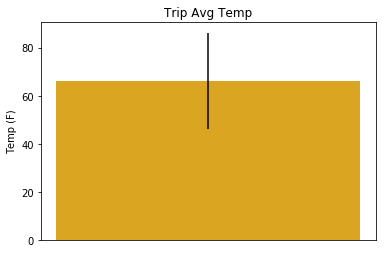

In [185]:
plt.bar(max_n,height=avg_n, yerr=yerr_n, align='center',width=.5,color='goldenrod')
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.title('Trip Avg Temp')
plt.ylabel('Temp (F)')
plt.show()

In [186]:
from flask import Flask

# Create an app

app = Flask(__name__)

results = (session
           .query(Measurements.tobs,Measurements.date)
          .filter(Measurements.date>=(dt.date.today()-dt.timedelta(days=365)))
          .all())

year_query = []

# Define what to do when a user hits the index route
# http://127.0.0.1:5000/

# Query for the dates and temperature observations from the last year.

# Convert the query results to a Dictionary using `date` as the key and `tobs` as the value.

# Return the json representation of your dictionary.

@app.route("/api/v1.0/precipitation")
def obs():
    
    for result in results:
        
        year_query.append(result.date,result.tobs)
    
        obs_dict = {year_query[0]:year_query[1]}
    
    return jsonify(obs_dict)

OSError: [Errno 48] Address already in use

In [183]:
# Return a json list of stations from the dataset.

sta_list = []

stations_each = (session
           .query(Stations.station)
            .all())

@app.route("/api/v1.0/stations")
def sta():
    
    for stations in stations_each:
        sta_list.append(stations)

    return jsonify(sta_list)

In [184]:
# Return a json list of Temperature Observations (tobs) for the previous year

tobs_list = []

results_tobs = (session
           .query(Measurements.tobs)
          .filter(Measurements.date>=(dt.date.today()-dt.timedelta(days=365)))
          .all())

@app.route("/api/v1.0/tobs")
def yeartobs():

    for result in results_tobs:
    
        tobs_list.append(result)

    return jsonify(tobs_list)

if __name__ == "__main__":
    app.run(debug=True)